## 1D diffusion equation
\begin{align}
\frac{\partial u} {\partial t} = \nu\frac{\partial^2 u} {\partial x^2}
\end{align}

### taylor expansion
expressing a function into a sum of power functions  
$$ f(x) = p_{\infty}(x) $$  
\begin{eqnarray*} p(x) & = & \sum^{\infty} _{n=0} \frac{f^{(n)} (a)} {n!}(x-a)^{(n)} \\ & = & f(a) + f'(a)(x-a) + \frac {1} {2!} f''(a)(x-a)^2 + \cdots + \frac {1} {n!}f^{(n)}(a)(x-a)^{n}
\end{eqnarray*}

### Apply on u
\begin{eqnarray*} 
u_{i+1} & = & u_{i} + \left. \Delta x  \frac{\partial u} {\partial x}\right|_{i} 
+ \left. \frac{\Delta x^2} {2!}  \frac{\partial^2 u} {\partial x^2}\right|_{i}
+ \left. \frac{\Delta x^3} {3!}  \frac{\partial^3 u} {\partial x^3}\right|_{i}
+ O(\Delta x^4)
\end{eqnarray*}
\begin{eqnarray*} 
u_{i-1} & = & u_{i} - \left. \Delta x  \frac{\partial u} {\partial x}\right|_{i} 
+ \left. \frac{\Delta x^2} {2!}  \frac{\partial^2 u} {\partial x^2}\right|_{i}
- \left. \frac{\Delta x^3} {3!}  \frac{\partial^3 u} {\partial x^3}\right|_{i}
+ O(\Delta x^4)
\end{eqnarray*}

### Sum to get 2nd order derivative
\begin{eqnarray*} 
u_{i+1} + u_{i-1} & = & 2u_{i} + \left. {\Delta x^2}  \frac{\partial^2 u} {\partial x^2}\right|_{i}
+ O(\Delta x^4)
\end{eqnarray*}

### Rearranged
\begin{eqnarray*} 
\frac{\partial^2 u} {\partial x^2} = \frac {u_{i+1} - 2u_{i}+ u_{i-1}} {\Delta x^2}+ O(\Delta x^4)
\end{eqnarray*}

### So,
$$u_{i}^{n+1}=u_{i}^{n}+\frac{\nu\Delta t}{\Delta x^2}(u_{i+1}^{n}-2u_{i}^{n}+u_{i-1}^{n})$$

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

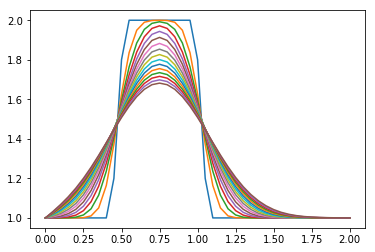

In [10]:
nx = 41
dx = 2 / (nx - 1)
nt = 80
nu = 0.3
sigma = 0.2
dt = sigma * dx**2 / nu

u = np.ones(nx)
u[int(0.5/dx) : int(1 / dx + 1)] = 2

un = np.ones(nx)

for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    if not n%5:
        plt.plot(np.linspace(0, 2,nx), u)